# Lab 1 - Introduction to the [Natural Language Toolkit](https://www.nltk.org/) (NLTK)
This notebook provides an introduction to NLTK. We also show various ways in which NLTK can be used for text processing.

**at the end of this notebook, you will be able to perform the following NLP tasks using NLTK**:
* **Sentence splitting**: *nltk.tokenize.sent_tokenize*
* **Tokenization**: *nltk.word_tokenize*
* **Part-of-speech (POS) tagging**: *nltk.pos_tag* 
* **Stop words recognition** 
* **Stemming and lemmatization**
     * *nltk.stem.porter.PorterStemmer*
     * *nltk.stem.snowball.SnowballStemmer*
     * *nltk.stem.wordnet.WordNetLemmatizer*
* **Constituency/dependency parsing** *nltk.RegexpParser*
* **Named Entity Recognition (NER)** *nltk.chunk.ne_chunk*

**If you want to learn more about these topics, you might find the following links useful (information from these blogs is used in this notebook):**
* [NLTK book](https://www.nltk.org/book/)
* [official NLTK website](https://www.nltk.org/)
* [an introduction to NLTK](https://www.pythonforengineers.com/introduction-to-nltk-natural-language-processing-with-python/)
* [another introduction to NLTK](https://nlpforhackers.io/introduction-nltk/)
* [yet another introduction to NLTK](https://textminingonline.com/dive-into-nltk-part-i-getting-started-with-nltk)
* [introduction to tokenization from Stanford](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)
* [introduction to part of speech tagging](http://aritter.github.io/courses/5525_slides/pos1.pdf)
* [introduction to stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
* [comparison stemming and lemmatization](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/)
* [introduction to Named Entity Recognition](https://www.codementor.io/bofinbabu/introduction-to-named-entity-recognition-ner-k584v86r6)
* [introduction to Named Entity Recognition using NLTK](https://nlpforhackers.io/named-entity-extraction/)

In [1]:
# we import pprint for better viewing of output and the regular expression module "re" which allows you to specify patterns of strings: words, characters, tags.
from pprint import pprint
import re

## Getting started ([NLTK Chapter 1, Section 1.2](https://www.nltk.org/book/ch01.html))
The Natural Language Toolkit is a python package that provides both easy access to [popular corpora and lexical resources](https://www.nltk.org/book/ch02.html#tab-corpora). Also, it contains a wide range of text processing modules. NLTK is an open source and community-driven project. Please note that it does not contain the state of the art NLP modules, nor is it the fastest. However, it is perfect for getting started with NLP. 

Please try to import the nltk module by running the cell below:

In [1]:
import nltk  

If you get an error, such as *ModuleNotFoundError: No module named 'nltk'*, please install the module and try again.

Also, the first time you import nltk on your local machine, you need to download the data sets that are used in the course. You will get a pop-up window to select datasets. The minimal data set you need is *book*. Take your time to check out the different TABs and have an idea of what is there. Make sure you have sufficient disk space to store what you want. By default, the data are stored in your local home folder, e.g. \users\myhome\nltk_data. If you did download once, you can skip the next step as the data are in your local drive. If you need another dataset, run it again and take your pick.

**Tip:** comment out *nltk.download()* after you've used it, such that you can use *Restart kernel and run all cells* without going through the download procedure again.

In [3]:
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

After dowbload, look for the"nltk_data" folder on your local disk. You need to know the location of the data for further lab sessions of this course so that you can check data formats and specify the paths.

Please run the following cell to check that you can import the Brown corpus (which is part of the *book* data set)

In [2]:
from nltk.corpus import brown

Now that you have everything installed, we can start with showing examples of text processing using NLTK.

## Sentence splitting ([NLTK Chapter 3, Section 3.8](https://www.nltk.org/book/ch03.html))
Consider the following input that is given to a computer:

In [2]:
a_text = '''Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open. H.J. Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million. It's the first group action of its kind in Britain.'''
print(a_text)

Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open. H.J. Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million. It's the first group action of its kind in Britain.


Before the computer can apply most kinds of NLP tasks, it has to know what the separate sentences are.

Let's try splitting the text using a **dot**

In [11]:
dot_splitted_text = a_text.split('.')
for index, sentence in enumerate(dot_splitted_text, 1):
    print(f'SENTENCE: {index} {sentence}')

SENTENCE: 1 Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U
SENTENCE: 2 S
SENTENCE: 3  Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U
SENTENCE: 4 S
SENTENCE: 5  Open
SENTENCE: 6  H
SENTENCE: 7 J
SENTENCE: 8  Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd
SENTENCE: 9  for about $500 million
SENTENCE: 10  It's the first group action of its kind in Britain
SENTENCE: 11 


This clearly did not work. Many abbreviations such us **U.S.** have dots in them. However, sentences normally start with a capital letter. What would happen if we split a text using a dot followed by a space followed by a capital letter. This should work, right?

In [12]:
splitted_using_dot_space_capital = re.split('\. [A-Z]', a_text)
for index, sentence in enumerate(splitted_using_dot_space_capital, 1):
    print(f'SENTENCE: {index} {sentence}')

SENTENCE: 1 Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S
SENTENCE: 2 yder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S
SENTENCE: 3 pen
SENTENCE: 4 .J
SENTENCE: 5 einz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million
SENTENCE: 6 t's the first group action of its kind in Britain.


Unfortunately no. In our text, we have the following sequences:
* **U.S. Ryder**
* **H.J. Heinz Company**

Conclusion, it is actually not that easy. Luckily, NLTK contains models that are more complex than what we've just seen. Let's see how it performs on our text.

In [13]:
from nltk.tokenize import sent_tokenize

In [14]:
nltk_sentence_splitted = sent_tokenize(a_text)
for index, sentence in enumerate(nltk_sentence_splitted, 1):
    print(f'SENTENCE: {index} {sentence}')

SENTENCE: 1 Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open.
SENTENCE: 2 H.J.
SENTENCE: 3 Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million.
SENTENCE: 4 It's the first group action of its kind in Britain.


Interestingly, the model is not perfect. It correctly determines that *U.S. Ryder Cup* is not the end of the sentence. However, it states that **H.J.** is the end of a sentence.

## Tokenization ([NLTK Chapter 5, Section 1](https://www.nltk.org/book/ch05.html))

One of the first steps of Natural Language Processing is tokenization. It is generally defined as chopping a text into pieces, which are called tokens.

The most naive way to apply tokenization is to simply split a text using spaces. Let's try this. Please run the following cell.

In [15]:
example_sentence = "I'll refuse to permit you to obtain the refuse permit."
tokenized_using_spaces = example_sentence.split(' ')
print(tokenized_using_spaces)

["I'll", 'refuse', 'to', 'permit', 'you', 'to', 'obtain', 'the', 'refuse', 'permit.']


Think about the above line, is it actually the same as tokenizing? 

..

..

Well, yes and no. Tokenizing using spaces works for most tokens. However, it does not work for expressions such as **I'll**.

Let's try a real tokenizer....

In [16]:
tokenized_using_tokenizer = nltk.word_tokenize(example_sentence)
print(tokenized_using_tokenizer)

['I', "'ll", 'refuse', 'to', 'permit', 'you', 'to', 'obtain', 'the', 'refuse', 'permit', '.']


Please note that **I'll** is now correctly tokenized.

## Part of speech tagging ([Chapter 5, Section 1 Using a Tagger](https://www.nltk.org/book/ch05.html))
Now that we've established the tokens in a text, a useful next step is to determine the part of speech of each token.
The part of speech is the syntactic category of a token. 

| the | red   | clown  | behaved  | weirdly  |
|---|---|---|---|---|
| determiner | adjective | noun | verb | adverb |

We can replace tokens with another token with the same part of speech, and the sentence would still be grammatical. For example:
* The **blue** clown behaved weirdly.
* The red **cow** behaved weirdly.
* The red clown **walked** weirdly.

NLTK also provides a method to automatically tag each token in a text with a part of speech tag.

In [17]:
nltk.pos_tag(['I', "'ll", 'refuse', 'to', 'permit', 'you', 'to', 'obtain', 'the', 'refuse', 'permit', '.'])

[('I', 'PRP'),
 ("'ll", 'MD'),
 ('refuse', 'VB'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('you', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN'),
 ('.', '.')]

Please note that each token has now been tagged with a part of speech tag. You might be surprised to see **VB** instead of **verb**. The main reason is that there is not one group of part of speech labels, there are [many](https://www.sketchengine.eu/tagsets/english-part-of-speech-tagset/)! The most popular tagset in NLP is the [Penn Treebank POS tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). This is also the default one used in NLTK.

**Tasks**: 
* Make sure you know what each tag means. 
* Try some other sentences to get an idea of how the tagger works and where it fails.

## Removing Stopwords
An important step in preprocessing data is to remove words that might not be relevant to the type of NLP task that you want to perform.
It's not uncommon to remove commonly used words, so-called stopwords. NLTK actually keeps lists of stopwords for many languages.
We show how to remove stopwords for English text.

In [18]:
from nltk.corpus import stopwords

In [19]:
english_stopwords = stopwords.words('english')
set_english_stopwords = set(english_stopwords) # sets are faster to check if an element is in

In [20]:
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
a_sentence = ['the', 'rain', 'on', 'the', 'roof', 'was', 'soothing']

In [22]:
without_stopwords = []

for token in a_sentence:
    if token not in set_english_stopwords:
        without_stopwords.append(token)

print(without_stopwords)

['rain', 'roof', 'soothing']


Yes! We've managed to remove the stopwords!

### Questions:
* What are stopwords and why would you want to remove these from a text?
* How would you make a stop word list automatically?

#### cleaning up text

The text you want to analyze can sometimes be messy. Punctuation can be attached to words that are at the end of a sentence, e.g., **afraid.** in the example sentences below, or there are just strange characters attached to words, e.g., an underscore in **works** in the example sentences below. It is important to clean your text before analyzing it.

In [23]:
messy_sentence = "The point of this example is to _learn how basic text cleaning works_ on *very simple* data."

In [24]:
import string

As an example, we will remove all occurrences from the following characters from our example sentences.

In [25]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


We first tokenize our example sentence:

In [26]:
tokenized_messy_sentence = nltk.word_tokenize(messy_sentence)
print(tokenized_messy_sentence)

['The', 'point', 'of', 'this', 'example', 'is', 'to', '_learn', 'how', 'basic', 'text', 'cleaning', 'works_', 'on', '*very', 'simple*', 'data', '.']


Now we clean the tokens of these unwanted characters:

In [27]:
table = {ord(char): '' for char in string.punctuation} # in case you're interested, this is called a dict comprehension

cleaned_messy_sentence = []
for messy_word in tokenized_messy_sentence:
    
    cleaned_word = messy_word.translate(table) # the translate method allows us to remove all unwanted charachters
    print()
    print('OLD', messy_word)
    print('NEW', cleaned_word)
    cleaned_messy_sentence.append(cleaned_word)

print(cleaned_messy_sentence)


OLD The
NEW The

OLD point
NEW point

OLD of
NEW of

OLD this
NEW this

OLD example
NEW example

OLD is
NEW is

OLD to
NEW to

OLD _learn
NEW learn

OLD how
NEW how

OLD basic
NEW basic

OLD text
NEW text

OLD cleaning
NEW cleaning

OLD works_
NEW works

OLD on
NEW on

OLD *very
NEW very

OLD simple*
NEW simple

OLD data
NEW data

OLD .
NEW 
['The', 'point', 'of', 'this', 'example', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data', '']


## Stemming and lemmatizing ([NLTK book Chapter 3, Section 3.6](https://www.nltk.org/book/ch03.html))
NLTK has various modules for stripping inflection of words (stemming) or finding the lemma (the form you can find in a dictionary). Below is a script to stem and lemmatize the words in a text example after tokenizing the text.

In [28]:
raw="SHUT UP! Enough already, Ballstein! Who cares about Derek Zoolander anyway? The man has only one look, for Christ's sake! Blue Steel? Ferrari? Le Tigra?"

In [29]:
# Stemming and Lemmatizing
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
tokens = nltk.word_tokenize(raw)

porterlemmas = []
wordnetlemmas = []
snowballlemmas = []

for word in tokens:
    porterlemmas.append(porter.stem(word))
    snowballlemmas.append(snowball.stem(word))
    wordnetlemmas.append(wordnet.lemmatize(word))

print('Porter')
print(porterlemmas)
print('Snowball')
print(snowballlemmas)
print('Wordnet')
print(wordnetlemmas)

Porter
['shut', 'UP', '!', 'enough', 'alreadi', ',', 'ballstein', '!', 'who', 'care', 'about', 'derek', 'zooland', 'anyway', '?', 'the', 'man', 'ha', 'onli', 'one', 'look', ',', 'for', 'christ', "'s", 'sake', '!', 'blue', 'steel', '?', 'ferrari', '?', 'Le', 'tigra', '?']
Snowball
['shut', 'up', '!', 'enough', 'alreadi', ',', 'ballstein', '!', 'who', 'care', 'about', 'derek', 'zooland', 'anyway', '?', 'the', 'man', 'has', 'onli', 'one', 'look', ',', 'for', 'christ', "'s", 'sake', '!', 'blue', 'steel', '?', 'ferrari', '?', 'le', 'tigra', '?']
Wordnet
['SHUT', 'UP', '!', 'Enough', 'already', ',', 'Ballstein', '!', 'Who', 'care', 'about', 'Derek', 'Zoolander', 'anyway', '?', 'The', 'man', 'ha', 'only', 'one', 'look', ',', 'for', 'Christ', "'s", 'sake', '!', 'Blue', 'Steel', '?', 'Ferrari', '?', 'Le', 'Tigra', '?']


## Question:
* What do you notice as a difference?

## Named Entity Recognition (NER) ([NLTK Chapter 7, Section 5](https://www.nltk.org/book/ch07.html))
In Named Entity Recognition, the goal is determine which noun phrases refer to named entities.
Named entities can be persons, locations, organizations, etc.
Please look at the example to try to understand what the task is about.
**note**: if the image does not show, you can view it [here](https://researchkb.files.wordpress.com/2014/02/ner.png). 

![title](../images/ner.png)

In [30]:
from nltk.chunk import ne_chunk

text = '''In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices. Samsung, which is the world's top mobile phone maker, is appealing the ruling. A similar case in the UK found in Samsung's favour and ordered Apple to publish an apology making clear that the South Korean firm had not copied its iPad when designing its own devices.'''
sentences = nltk.sent_tokenize(text)
for sentence in sentences:
    
    tokens = nltk.word_tokenize(sentence)
    tokens_pos_tagged = nltk.pos_tag(tokens)
    tokens_pos_tagged_and_named_entities = ne_chunk(tokens_pos_tagged)
    print()
    print('ORIGINAL SENTENCE', sentence)
    print('NAMED ENTITY RECOGNITION OUTPUT', tokens_pos_tagged_and_named_entities)


ORIGINAL SENTENCE In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices.
NAMED ENTITY RECOGNITION OUTPUT (S
  In/IN
  (GPE August/NNP)
  ,/,
  (PERSON Samsung/NNP)
  lost/VBD
  a/DT
  (GSP US/NNP)
  patent/NN
  case/NN
  to/TO
  (GPE Apple/NNP)
  and/CC
  was/VBD
  ordered/VBN
  to/TO
  pay/VB
  its/PRP$
  rival/JJ
  $/$
  1.05bn/CD
  (/(
  £0.66bn/NN
  )/)
  in/IN
  damages/NNS
  for/IN
  copying/VBG
  features/NNS
  of/IN
  the/DT
  (ORGANIZATION iPad/NN)
  and/CC
  (ORGANIZATION iPhone/NN)
  in/IN
  its/PRP$
  (GPE Galaxy/NNP)
  range/NN
  of/IN
  devices/NNS
  ./.)

ORIGINAL SENTENCE Samsung, which is the world's top mobile phone maker, is appealing the ruling.
NAMED ENTITY RECOGNITION OUTPUT (S
  (GPE Samsung/NNP)
  ,/,
  which/WDT
  is/VBZ
  the/DT
  world/NN
  's/POS
  top/JJ
  mobile/NN
  phone/NN
  maker/NN
  ,/,
  is/VBZ
  appealing/VBG
  the/D

Please observe that for textual mentions such as **August** and **Samsung**, an named entity label is assigned.
The meaning of named entity labels is:
* geo = Geographical Entity
* org = Organization
* per = Person
* gpe = Geopolitical Entity
* tim = Time indicator
* art = Artifact
* eve = Event
* nat = Natural Phenomenon

Please try to understand the output from NLTK regarding named entity recognition. 

### Task
* what do you think of the performance of the NER module in the NLTK?

## Constituency/dependency parsing ([NLTK Book Chapter 7, Section 2.1](https://www.nltk.org/book/ch07.html))
Please consider the following sentence.
- **the cat saw the dog.**

As a speaker of English, you immediately start to parse the sentence. You determine that **the cat** is the subject, **saw** is the main verb, and **the dog** is the direct object. With **constituency/dependency parsing**, we attempt to learn computers to parse sentence just like humans do.

We will use a module called **RegexpParser**, which is part of NLTK.

In [31]:
sentence = [("the", "DT"), ("little", "JJ"),
            ("dog", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN")]

We then create a very simple grammar, that we can extend later on.

In [32]:
grammar = 'NP: {<DT><NN>}'
constituent_parser = nltk.RegexpParser(grammar)

Our grammar now only contains one rule, which states that a noun phrase (NP) consists of a determiner (DT) followed by a singular noun (NN). 
The tags come from the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

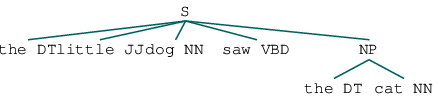

In [33]:
constituent_structure = constituent_parser.parse(sentence)
constituent_structure

Please note that **the** and **cat** have now been identified as a noun phrase (NP). However, **the little dog** has not been identified, because we did not include that it was possible to have adjectives between the determiner and the noun. Let's fix that!

In [34]:
grammar = 'NP: {<DT><JJ>*<NN>}'
constituent_parser = nltk.RegexpParser(grammar)

We've now changed the rule for an NP. A noun phrase is now defined as:
* determiner (DT) followed by one adjective (JJ) followed by a singular noun (NN)

The star is needed to indicate that the adjective is optional.

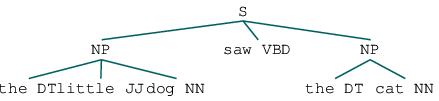

In [35]:
constituent_structure = constituent_parser.parse(sentence)
constituent_structure

You can continue to extend the grammar. Try to understand the following grammar:

In [36]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}           # Preposition
V: {<V.*>}          # Verb
PP: {<P> <NP>}      # PP -> P NP
VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*''')

[('In', 'IN'), ('the', 'DT'), ('house', 'NN'), ('the', 'DT'), ('yellow', 'JJ'), ('cat', 'NN'), ('saw', 'VBD'), ('the', 'DT'), ('dog', 'NN')]


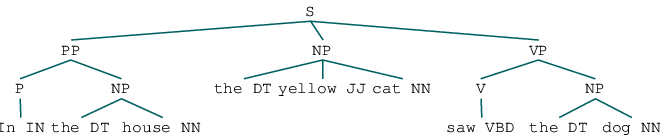

In [37]:
tokens = ['In', 'the', 'house', 'the', 'yellow', 'cat', 'saw', 'the', 'dog']
tagged = nltk.pos_tag(tokens)
print(tagged)
constituent_structure = constituent_parser.parse(tagged)
constituent_structure

### save tree structure to file

In [47]:
from nltk.draw.tree import TreeView
TreeView(constituent_structure)._cframe.print_to_file('output.ps')

Please convert the .ps file to PDF.